# <span style="color:#3775a8; font-weight: bold;">DDSP - Final Projet: </span>

### <span style="color:#3775a8; font-weight: bold;">Team: </span>
+ <span style="color:#3775a8; font-weight: bold;"> Timur</span>
+ <span style="color:#3775a8; font-weight: bold;"> Ludovica</span>
+ <span style="color:#3775a8; font-weight: bold;"> Giacomo</span>
+ <span style="color:#3775a8; font-weight: bold;"> Juan Jacobo Arias</span>

In [1]:
# Installing dependencies

!pip install unidecode
!pip install wordcloud
!pip install autocorrect

In [3]:
# Packages for Data management 
import pandas as pd
import numpy as np

# Packages for pré processing
from unidecode import unidecode
import re
from nltk.stem import SnowballStemmer

# Packages for Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import defaultdict
from nltk.probability import FreqDist
from nltk.probability import FreqDist


# Packages for vectorization
from sklearn.feature_extraction.text import TfidfVectorizer 
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer


# Packages for modélisation
from sklearn.decomposition import LatentDirichletAllocation
import random

#Packages for bigrams
from collections import Counter
from nltk.util import ngrams

# 1. Exploration of our dataset

In [25]:
tweets = pd.read_csv("terror_nodups_new.csv")

print(f"Our dataset has {tweets.shape[0]} lines and {tweets.shape[1]} columns" )

tweets.count()

<ipython-input-25-a4e2ad13aaa9>:1: DtypeWarning: Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets = pd.read_csv("terror_nodups_new.csv")


Our dataset has 118576 lines and 53 columns


Unnamed: 0.1              118576
Unnamed: 0                118576
id                        118576
author_id                 118576
created_at                118576
edit_history_tweet_ids    118576
lang                      118576
in_reply_to_user_id        56020
conversation_id           118576
text                      118576
reply_settings            118576
possibly_sensitive        118576
place_id                    1318
place_type                    28
coord                         28
media_keys                  9430
retweeted_id               21354
quoted_id                   9907
replied_id                 54542
url                        40885
expanded_url               40885
unwound_url                40885
title_url                  40885
description_url            40885
mention_name               80587
hashtags                   23125
annotations                    0
retweet_count             118576
reply_count               118576
like_count                118576
quote_coun

In [26]:
tweets.head(10)

Unnamed: 0.1  Unnamed: 0                   id            author_id  \
0             0           0  1604949964429426688           1257932018   
1             1           1  1604949944984653849  1417719872331595780   
2             2           2  1604949933508816896  1470318045314887683   
3             3           3  1604949930220847104            928722823   
4             4           4  1604949860993695746           2199917760   
5             5           5  1604949840882024449           2163849279   
6             6           6  1604949689526210561  1193601069554819073   
7             7           8  1604949635847659520  1587003793266327552   
8             8           9  1604949560333312000  1349093653764067330   
9             9          10  1604949515714416643  1175479112682618881   

                  created_at  edit_history_tweet_ids lang  \
0  2022-12-19 21:21:04+00:00     1604949964429426688   fr   
1  2022-12-19 21:21:00+00:00     1604949944984653849   fr   
2  2022-12-19 21:20:57+00:00     1604949933508816896   fr   
3  2022-12-19 21:20:56+00:00     1604949930220847104   fr   
4  2022-12-19 21:20:40+00:00     1604949860993695746   fr   
5  2022-12-19 21:20:35+00:00     1604949840882024449   fr   
6  2022-12-19 21:19:59+00:00     1604949689526210561   fr   
7  2022-12-19 21:19:46+00:00     1604949635847659520   fr   
8  2022-12-19 21:19:28+00:00     1604949560333312000   fr   
9  2022-12-19 21:19:17+00:00     1604949515714416643   fr   

   in_reply_to_user_id      conversation_id  \
0                  NaN  1604949964429426688   
1          361857853.0  1604060382779396099   
2                  NaN  1604949933508816896   
3                  NaN  1604949930220847104   
4                  NaN  1604949860993695746   
5                  NaN  1604949840882024449   
6          612345431.0  1604821400111697920   
7                  NaN  1604949635847659520   
8                  NaN  1604949560333312000   
9                  NaN  1604949515714416643   

                                                text  ...  \
0  RT @_BeFootball: Quel accueil pour Léo Messi à...  ...   
1  @Autochtone_fr @Jager80568144 @DubhStephane @A...  ...   
2  RT @Marc_Claret75: 🔴Acceuil des migrants :nous...  ...   
3  RT @Tajmaat_Service: 🇩🇿🇨🇵 FLASH - Un #Algérien...  ...   
4  RT @chaine_verte: La Chaîne Verte est un group...  ...   
5  RT @mikaeloff2: “Sale Blanc” et, autres, un dé...  ...   
6  @pjacquemain @Valeurs C'est quoi qui vs choque...  ...   
7  RT @Anastas77581540: Soutien total à #NicolasB...  ...   
8  RT @RMCsport: 🇲🇦 Les Marocains seront célébrés...  ...   
9  RT @ArnaultRaphael: Les super-giga-ultra-natio...  ...   

                                      text_tokenized  \
0  ['quel', 'accueil', 'léo', 'messi', 'retour', ...   
1  ['puis', 'ne', 'faut', 'pas', 'oublier', 'fran...   
2  ['acceuil', 'migrants', 'passés', 'foyer', 'ac...   
3  ['flash', 'algérien', 'arrivé', 'france', 'âge...   
4  ['chaîne', 'verte', 'groupe', 'citoyens', 'fra...   
5  ['sale', 'blanc', 'autres', 'déchaînement', 'h...   
6  ['quoi', 'vs', 'choque', 'chrétien', 'pas', 'm...   
7  ['soutien', 'total', 'nicolasbay', 'subit', 'i...   
8  ['marocains', 'célébrés', 'mardi', 'après', 'm...   
9  ['super', 'giga', 'ultra', 'nationaliste', 'pa...   

                                     text_lemmitized  \
0  ['quel', 'accueil', 'léo', 'messi', 'retour', ...   
1  ['puis', 'ne', 'faut', 'pas', 'oublier', 'fran...   
2  ['acceuil', 'migrant', 'passé', 'foyer', 'accu...   
3  ['flash', 'algérien', 'arrivé', 'france', 'âge...   
4  ['chaîne', 'verte', 'groupe', 'citoyen', 'fran...   
5  ['sale', 'blanc', 'autres', 'déchaînement', 'h...   
6  ['quoi', 'vs', 'choque', 'chrétien', 'pas', 'm...   
7  ['soutien', 'total', 'nicolasbay', 'subit', 'i...   
8  ['marocain', 'célébrés', 'mardi', 'après', 'mi...   
9  ['super', 'giga-octet', 'ultra', 'nationaliste...   

                                       tokens_merged  \
0               quel accueil léo messi retour f

In [27]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118576 entries, 0 to 118575
Data columns (total 53 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0.1            118576 non-null  int64  
 1   Unnamed: 0              118576 non-null  int64  
 2   id                      118576 non-null  int64  
 3   author_id               118576 non-null  int64  
 4   created_at              118576 non-null  object 
 5   edit_history_tweet_ids  118576 non-null  int64  
 6   lang                    118576 non-null  object 
 7   in_reply_to_user_id     56020 non-null   float64
 8   conversation_id         118576 non-null  int64  
 9   text                    118576 non-null  object 
 10  reply_settings          118576 non-null  object 
 11  possibly_sensitive      118576 non-null  bool   
 12  place_id                1318 non-null    object 
 13  place_type              28 non-null      object 
 14  coord               

We notice that the format of the date "created_at" is not in the propper format. Let's change it:

In [28]:
# Modification of the "created_at" type:
tweets['created_at'] = pd.to_datetime(tweets['created_at'], format = '%Y-%m-%d')
tweets['year'] = tweets['created_at'].dt.year
tweets['month'] = tweets['created_at'].dt.month
tweets.rename(columns = {'created_at':'date'}, inplace = True)

In [29]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118576 entries, 0 to 118575
Data columns (total 55 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   Unnamed: 0.1            118576 non-null  int64              
 1   Unnamed: 0              118576 non-null  int64              
 2   id                      118576 non-null  int64              
 3   author_id               118576 non-null  int64              
 4   date                    118576 non-null  datetime64[ns, UTC]
 5   edit_history_tweet_ids  118576 non-null  int64              
 6   lang                    118576 non-null  object             
 7   in_reply_to_user_id     56020 non-null   float64            
 8   conversation_id         118576 non-null  int64              
 9   text                    118576 non-null  object             
 10  reply_settings          118576 non-null  object             
 11  possibly_sensitive      11

In [30]:
# Nan values in the column "text"
tweets["text"].isnull().sum().sum()

0

# 2. Cleaning and viewing the content of tweets  

In [33]:
# Let's define our stop words' list :

stopWords = ['a', 'abord', 'absolument', 'afin', 'ah', 'ai', 'aie', 'ailleurs', 'ainsi', 'ait', 'allaient', 'allo', 'allons', 
             'allô', 'alors', 'anterieur', 'anterieure', 'anterieures', 'apres', 'après', 'as', 'assez', 'attendu', 'au', 
             'aucun', 'aucune', 'aujourd', "aujourd'hui", 'aupres', 'auquel', 'aura', 'auraient', 'aurait', 'auront', 'aussi', 
             'autre', 'autrefois', 'autrement', 'autres', 'autrui', 'aux', 'auxquelles', 'auxquels', 'avaient', 'avais', 'avait', 
             'avant', 'avec', 'avoir', 'avons', 'ayant', 'bah', 'bas', 'basee', 'bat', 'beau', 'beaucoup', 'bien', 'bigre', 'boum', 
             'bravo', 'brrr', "c'", 'car', 'ce', 'ceci', 'cela', 'celle', 'celle-ci', 'celle-là', 'celles', 'celles-ci', 'celles-là', 
             'celui', 'celui-ci', 'celui-là', 'cent', 'cependant', 'certain', 'certaine', 'certaines', 'certains', 'certes', 'ces', 
             'cet', 'cette', 'ceux', 'ceux-ci', 'ceux-là', 'chacun', 'chacune', 'chaque', 'cher', 'chers', 'chez', 'chiche', 'chut', 
             'chère', 'chères', 'ci', 'cinq', 'cinquantaine', 'cinquante', 'cinquantième', 'cinquième', 'clac', 'clic', 'combien', 
             'comme', 'comment', 'comparable', 'comparables', 'compris', 'concernant', 'contre', 'couic', 'crac', 'c’', "d'", 'da', 
             'dans', 'de', 'debout', 'dedans', 'dehors', 'deja', 'delà', 'depuis', 'dernier', 'derniere', 'derriere', 'derrière', 
             'des', 'desormais', 'desquelles', 'desquels', 'dessous', 'dessus', 'deux', 'deuxième', 'deuxièmement', 'devant', 'devers', 
             'devra', 'different', 'differentes', 'differents', 'différent', 'différente', 'différentes', 'différents', 'dire', 
             'directe', 'directement', 'dit', 'dite', 'dits', 'divers', 'diverse', 'diverses', 'dix', 'dix-huit', 'dix-neuf', 
             'dix-sept', 'dixième', 'doit', 'doivent', 'donc', 'dont', 'douze', 'douzième', 'dring', 'du', 'duquel', 'durant', 'dès', 
             'désormais', 'd’', 'effet', 'egale', 'egalement', 'egales', 'eh', 'elle', 'elle-même', 'elles', 'elles-mêmes', 'en', 
             'encore', 'enfin', 'entre', 'envers', 'environ', 'es', 'est', 'et', 'etaient', 'etais', 'etait', 'etant', 'etc', 'etre', 
             'eu', 'euh', 'eux', 'eux-mêmes', 'exactement', 'excepté', 'extenso', 'exterieur', 'fais', 'faisaient', 'faisant', 'fait', 
             'façon', 'feront', 'fi', 'flac', 'floc', 'font', 'gens', 'ha', 'hein', 'hem', 'hep', 'hi', 'ho', 'holà', 'hop', 'hormis', 
             'hors', 'hou', 'houp', 'hue', 'hui', 'huit', 'huitième', 'hum', 'hurrah', 'hé', 'hélas', 'i', 'il', 'ils', 'importe', 
             "j'", 'je', 'jusqu', 'jusque', 'juste', 'j’', "l'", 'la', 'laisser', 'laquelle', 'las', 'le', 'lequel', 'les', 
             'lesquelles', 'lesquels', 'leur', 'leurs', 'longtemps', 'lors', 'lorsque', 'lui', 'lui-meme', 'lui-même', 'là', 'lès', 'l’', 
             "m'", 'ma', 'maint', 'maintenant', 'mais', 'malgre', 'malgré', 'maximale', 'me', 'meme', 'memes', 'merci', 'mes', 'mien', 'mienne', 
             'miennes', 'miens', 'mille', 'mince', 'minimale', 'moi', 'moi-meme', 'moi-même', 'moindres', 'moins', 'mon', 
             'moyennant', 'même', 'mêmes', 'm’', "n'", 'na', 'naturel', 'naturelle', 'naturelles', 'ne', 'neanmoins', 'necessaire', 
             'necessairement', 'neuf', 'neuvième', 'ni', 'nombreuses', 'nombreux', 'non', 'nos', 'notamment', 'notre', 'nous', 'nous-mêmes', 
             'nouveau', 'nul', 'néanmoins', 'nôtre', 'nôtres', 'n’', 'o', 'oh', 'ohé', 'ollé', 'olé', 'on', 'ont', 'onze', 'onzième', 'ore', 
             'ou', 'ouf', 'ouias', 'oust', 'ouste', 'outre', 'ouvert', 'ouverte', 'ouverts', 'où', 'paf', 'pan', 'par', 'parce', 'parfois', 
             'parle', 'parlent', 'parler', 'parmi', 'parseme', 'partant', 'particulier', 'particulière', 'particulièrement', 'pas', 'passé', 
             'pendant', 'pense', 'permet', 'personne', 'peu', 'peut', 'peuvent', 'peux', 'pff', 'pfft', 'pfut', 'pif', 'pire', 'plein', 'plouf', 
             'plus', 'plusieurs', 'plutôt', 'possessif', 'possessifs', 'possible', 'possibles', 'pouah', 'pour', 'pourquoi', 'pourrais', 'pourrait', 
             'pouvait', 'prealable', 'precisement', 'premier', 'première', 'premièrement', 'pres', 'probable', 'probante', 'procedant', 'proche', 
             'près', 'psitt', 'pu', 'puis', 'puisque', 'pur', 'pure', "qu'", 'quand', 'quant', 'quant-à-soi', 'quanta', 'quarante', 'quatorze', 
             'quatre', 'quatre-vingt', 'quatrième', 'quatrièmement', 'que', 'quel', 'quelconque', 'quelle', 'quelles', "quelqu'un", 'quelque', 
             'quelques', 'quels', 'qui', 'quiconque', 'quinze', 'quoi', 'quoique', 'qu’', 'rare', 'rarement', 'rares', 'relative', 'relativement', 
             'remarquable', 'rend', 'rendre', 'restant', 'reste', 'restent', 'restrictif', 'retour', 'revoici', 'revoilà', 'rien', "s'", 'sa', 
             'sacrebleu', 'sait', 'sans', 'sapristi', 'sauf', 'se', 'sein', 'seize', 'selon', 'semblable', 'semblaient', 'semble', 'semblent', 
             'sent', 'sept', 'septième', 'sera', 'seraient', 'serait', 'seront', 'ses', 'seul', 'seule', 'seulement', 'si', 'sien', 'sienne', 
             'siennes', 'siens', 'sinon', 'six', 'sixième', 'soi', 'soi-même', 'soit', 'soixante', 'son', 'sont', 'sous', 'souvent', 'specifique', 
             'specifiques', 'speculatif', 'stop', 'strictement', 'subtiles', 'suffisant', 'suffisante', 'suffit', 'suis', 'suit', 'suivant', 
             'suivante', 'suivantes', 'suivants', 'suivre', 'superpose', 'sur', 'surtout', 's’', "t'", 'ta', 'tac', 'tant', 'tardive', 'te', 
             'tel', 'telle', 'tellement', 'telles', 'tels', 'tenant', 'tend', 'tenir', 'tente', 'tes', 'tic', 'tien', 'tienne', 'tiennes', 
             'tiens', 'toc', 'toi', 'toi-même', 'ton', 'touchant', 'toujours', 'tous', 'tout', 'toute', 'toutefois', 'toutes', 'treize', 'trente', 
             'tres', 'trois', 'troisième', 'troisièmement', 'trop', 'très', 'tsoin', 'tsouin', 'tu', 'té', 't’', 'un', 'une', 'unes', 
             'uniformement', 'unique', 'uniques', 'uns', 'va', 'vais', 'vas', 'vers', 'via', 'vif', 'vifs', 'vingt', 'vivat', 'vive', 'vives', 
             'vlan', 'voici', 'voilà', 'vont', 'vos', 'votre', 'vous', 'vous-mêmes', 'vu', 'vé', 'vôtre', 'vôtres', 'zut', 'à', 'â', 'ça', 'ès', 
             'étaient', 'étais', 'était', 'étant', 'été', 'être', 'ô','a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 
             'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'qu','https','co','rt','aileastick']

stopWords = [unidecode(sw) for sw in stopWords]

# Let's create the stemmer
stemmer = SnowballStemmer('french')

In [34]:
# Let's create a function to remove the stop words

def no_stop_word(string, stopWords):
    string = ' '.join([word for word in string.split() if word not in stopWords])
    return string

def stemmatise_text(text, stemmer):
    return " ".join([stemmer.stem(word) for word in text.split()])

In [35]:
def stem_cleaner(pandasSeries, stemmer, stopWords):
    
    print("#### Cleaning in process ####")
    
    # confirmation that each item is of type str
    pandasSeries = pandasSeries.apply(lambda x : str(x))
    
    # Change to lower case
    print("... Passage en minuscule") 
    pandasSeries = pandasSeries.apply(lambda x : x.lower())
    
    # Removal of accents
    print("... Change to lower case") 
    pandasSeries = pandasSeries.apply(lambda x : unidecode(x))
    
    # Detection of the year
    print("... Detection of the year") 
    pandasSeries = pandasSeries.apply(lambda x : re.sub(r'[0-9]{4}', 'annee', x))
    
    # Removal of special and numeric characters
    print("... Removal of special and numeric characters") 
    pandasSeries = pandasSeries.apply(lambda x :re.sub(r"[^a-z]+", ' ', x))
    
    # Removal of stop words
    print("... Removal of stop words") 
    pandasSeries = pandasSeries.apply(lambda x : no_stop_word(x, stopWords))
    
    # Stemming
    print("... Stemming") 
    pandasSeries = pandasSeries.apply(lambda x : stemmatise_text(x, stemmer))
    
    print("#### Cleaning finished! ####")

    return pandasSeries

In [36]:
%%time 
tweets['text_stem'] = stem_cleaner(tweets['text'], stemmer, stopWords)

tweets[['text', 'text_stem']].head()

#### Cleaning in process ####
... Passage en minuscule
... Change to lower case
... Detection of the year
... Removal of special and numeric characters
... Removal of stop words
... Stemming
#### Cleaning finished! ####
CPU times: user 1min, sys: 326 ms, total: 1min
Wall time: 1min


text  \
0  RT @_BeFootball: Quel accueil pour Léo Messi à...   
1  @Autochtone_fr @Jager80568144 @DubhStephane @A...   
2  RT @Marc_Claret75: 🔴Acceuil des migrants :nous...   
3  RT @Tajmaat_Service: 🇩🇿🇨🇵 FLASH - Un #Algérien...   
4  RT @chaine_verte: La Chaîne Verte est un group...   

                                           text_stem  
0         befootball accueil leo mess franc kzmpi ad  
1  autochton fr jageranneeanne dubhstephan actufo...  
2  marc claret acceuil migr somm pass foi accueil...  
3  tajmaat servic flash algerien arriv franc age ...  
4  chain vert chain vert group citoyen franc euro...

In [37]:
tweets[['text', 'text_stem']].tail()

text  \
118571  @vmaurus @TeamTPMP_ C’est sûre que les initiat...   
118572  @AsifArifMa MR  AIME   LA   FRANCE,  HELAS   A...   
118573  #amnesty\nLa condamnation d’un homme qui a off...   
118574  @BobSaintJacques @valeriemaupas Vous connaisse...   
118575  @rougecrypto @BFMTV @J_Bardella Mon nom n a ja...   

                                                text_stem  
118571  vmaurus teamtpmp sur initi trump plais gauch d...  
118572  asifarifm mr aim franc yeux franc souch bougno...  
118573  amnesty condamn homm offert the vet chaud dema...  
118574  bobsaintjacqu valeriemaup connaiss femm force ...  
118575  rougecrypto bfmtv bardel nom jam prenom design...

In [41]:
# Let's generate a variable that will count the number of words in each tweet:

tweets['num_words'] = tweets['text_stem'].apply(lambda x: len(x.split()))
tweets.head(10)

Unnamed: 0.1  Unnamed: 0                   id            author_id  \
0             0           0  1604949964429426688           1257932018   
1             1           1  1604949944984653849  1417719872331595780   
2             2           2  1604949933508816896  1470318045314887683   
3             3           3  1604949930220847104            928722823   
4             4           4  1604949860993695746           2199917760   
5             5           5  1604949840882024449           2163849279   
6             6           6  1604949689526210561  1193601069554819073   
7             7           8  1604949635847659520  1587003793266327552   
8             8           9  1604949560333312000  1349093653764067330   
9             9          10  1604949515714416643  1175479112682618881   

                       date  edit_history_tweet_ids lang  in_reply_to_user_id  \
0 2022-12-19 21:21:04+00:00     1604949964429426688   fr                  NaN   
1 2022-12-19 21:21:00+00:00     1604949944984653849   fr          361857853.0   
2 2022-12-19 21:20:57+00:00     1604949933508816896   fr                  NaN   
3 2022-12-19 21:20:56+00:00     1604949930220847104   fr                  NaN   
4 2022-12-19 21:20:40+00:00     1604949860993695746   fr                  NaN   
5 2022-12-19 21:20:35+00:00     1604949840882024449   fr                  NaN   
6 2022-12-19 21:19:59+00:00     1604949689526210561   fr          612345431.0   
7 2022-12-19 21:19:46+00:00     1604949635847659520   fr                  NaN   
8 2022-12-19 21:19:28+00:00     1604949560333312000   fr                  NaN   
9 2022-12-19 21:19:17+00:00     1604949515714416643   fr                  NaN   

       conversation_id                                               text  \
0  1604949964429426688  RT @_BeFootball: Quel accueil pour Léo Messi à...   
1  1604060382779396099  @Autochtone_fr @Jager80568144 @DubhStephane @A...   
2  1604949933508816896  RT @Marc_Claret75: 🔴Acceuil des migrants :nous...   
3  1604949930220847104  RT @Tajmaat_Service: 🇩🇿🇨🇵 FLASH - Un #Algérien...   
4  1604949860993695746  RT @chaine_verte: La Chaîne Verte est un group...   
5  1604949840882024449  RT @mikaeloff2: “Sale Blanc” et, autres, un dé...   
6  1604821400111697920  @pjacquemain @Valeurs C'est quoi qui vs choque...   
7  1604949635847659520  RT @Anastas77581540: Soutien total à #NicolasB...   
8  1604949560333312000  RT @RMCsport: 🇲🇦 Les Marocains seront célébrés...   
9  1604949515714416643  RT @ArnaultRaphael: Les super-giga-ultra-natio...   

   ... sentiment_vader  sentiment_textblob sentiment_vader_cat  \
0  ...          0.0000            0.000000             neutral   
1  ...          0.1695            0.000000            positive   
2  ...          0.4019           -0.200000            positive   
3  ...          0.6369            0.210000            positive   
4  ...          0.4391            0.152000            positive   
5  ...         -0.7506           -0.133333            negative   
6  ...          0.3182            0.077500            positive   
7  ...          0.3182            0.066667            positive   
8  ...          0.7650            0.000000            positive   
9  ...          0.4144            0.700000            positive   

  sentiment_textblob_cat        date sentiment_tf  year  month  \
0                neutral  2022-12-19     positive  2022     12   
1                neutral  2022-12-19     positive  2022     12   
2               negative  2022-12-19     negative  2022     12   
3               positive  2022-12-19     positive  2022     12   
4               positive  2022-12-19     positive  2022     12   
5               negative  2022-12-19     negative  2022     12   
6               positive  2022-12-19     positive  2022     12   
7               positive  2022-12-19     positive  2022     12   
8                neutral  2022-12-19     positive  2022     12   
9               positive  2022-12-19     positive  2022     12   

     

Text(0, 0.5, 'Tweets')

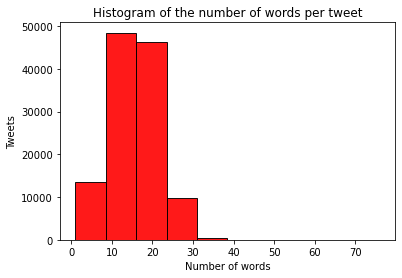

In [42]:
# Let's plot a histogram to see the distribution of words per tweet:

tweets['num_words'].plot(kind='hist',alpha=0.9,edgecolor='black', color='red');
plt.title('Histogram of the number of words per tweet')
plt.xlabel('Number of words')
plt.ylabel('Tweets')

In [44]:
# Grouping of tweets
corpus = tweets['text_stem'].tolist()


# Creation of a list that contains all the words
words = ' '.join(corpus)
word_list = re.findall(r"\w+", words)
print(f"List of words present in our corpus : \n{word_list}\n")

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [45]:
# list of unique words in our vocabulary

vocab_tweets = set(word_list)
print(f"The lenght of our vocabulary is {len(vocab_tweets)}")
print(f"List of unique words : \n{vocab_tweets}\n")

The lenght of our vocabulary is 129445
List of unique words : 
{'oytxqta', 'gissejf', 'njmlbf', 'ykkjt', 'dnn', 'mentent', 'cohabitat', 'certainemen', 'degaul', 'stopmedi', 'dana', 'malpol', 'perron', 'mrbrighanneeanne', 'ksaembassyfr', 'mhbrugcfcp', 'vr', 'bernathoustr', 'honorif', 'kiiro', 'nmgrnkpuiv', 'synonym', 'maresmajack', 'daash', 'zebistouill', 'ideologu', 'aureliearp', 'scamaratombin', 'defian', 'crvrirjtml', 'vnhvqwyz', 'amphe', 'allan', 'soph', 'uuu', 'hszzhw', 'shimianneeanne', 'syeihpgw', 'inaugur', 'nqumklawdd', 'stagefinal', 'inexpuls', 'ifa', 'temperatur', 'concarneau', 'domipreanne', 'hannah', 'esbrouf', 'fuhu', 'freeskat', 'inequit', 'grat', 'donim', 'deconcentr', 'louisoulmb', 'presidentevil', 'yymagin', 'irspb', 'sylviedebig', 'frenchgar', 'dexwvty', 'adelphecarem', 'ldznqrsnli', 'atjfwhwh', 'somatwoo', 'fyhzm', 'sevourebou', 'danoswilfrid', 'hok', 'euaeg', 'xuafaf', 'eldorados', 'wbmlgcfmdi', 'udrmgnqz', 'immigrechois', 'waldomess', 'nocheanneeanne', 'makeupbybin

In [46]:
# Let's determine the frequence of each word

freq = defaultdict(int) # Dictionary initialization

# Counts the occurrence of each word in the corpus
for word in word_list:
    freq[word] += 1
    
print(freq)

defaultdict(<class 'int'>, {'befootball': 181, 'accueil': 4496, 'leo': 21, 'mess': 300, 'franc': 125179, 'kzmpi': 2, 'ad': 66, 'autochton': 74, 'fr': 2302, 'jageranneeanne': 7, 'dubhstephan': 1, 'actufoot': 224, 'faut': 5403, 'oubli': 469, 'ne': 578, 'migrat': 559, 'oanneehzgrt': 1, 'marc': 107, 'claret': 25, 'acceuil': 10, 'migr': 2108, 'somm': 1569, 'pass': 1141, 'foi': 665, 'centr': 500, 'retent': 22, 'hotel': 45, 'vacanc': 96, 'bungalo': 1, 'tajmaat': 15, 'servic': 577, 'flash': 103, 'algerien': 685, 'arriv': 1543, 'age': 367, 'an': 3684, 'adam': 60, 'seddik': 5, 'devenu': 951, 'meilleur': 581, 'patissi': 10, 'chain': 723, 'vert': 418, 'group': 773, 'citoyen': 872, 'europeen': 936, 'portent': 661, 'object': 331, 'polit': 6087, 'clair': 1107, 'liber': 519, 'mikaeloff': 4, 'sal': 664, 'blanc': 1938, 'dechain': 37, 'hain': 3683, 'racist': 4080, 'hugo': 136, 'llor': 110, 'argentin': 2038, 'tweet': 980, 'ignom': 1, 'pjacquemain': 159, 'valeur': 2845, 'v': 846, 'choqu': 569, 'chretien': 

In [50]:
# Let's print the list of the 20 most quoted words in the tweets coupled with their respective frequency of appearance.

top_30 = FreqDist(word_list)
top_30 = top_30.most_common(30)

top_30

[('franc', 125179),
 ('islam', 46936),
 ('musulman', 30236),
 ('terror', 18726),
 ('racism', 18164),
 ('voil', 17547),
 ('pay', 16360),
 ('islamophob', 8399),
 ('anne', 8342),
 ('mond', 7073),
 ('fair', 6913),
 ('droit', 6765),
 ('polit', 6087),
 ('macron', 5966),
 ('religion', 5938),
 ('port', 5760),
 ('femm', 5696),
 ('faut', 5403),
 ('emmanuelmacron', 5356),
 ('problem', 4843),
 ('part', 4840),
 ('etat', 4498),
 ('accueil', 4496),
 ('libert', 4197),
 ('racist', 4080),
 ('extrem', 4036),
 ('attentat', 3933),
 ('vrai', 3842),
 ('immigr', 3803),
 ('an', 3684)]

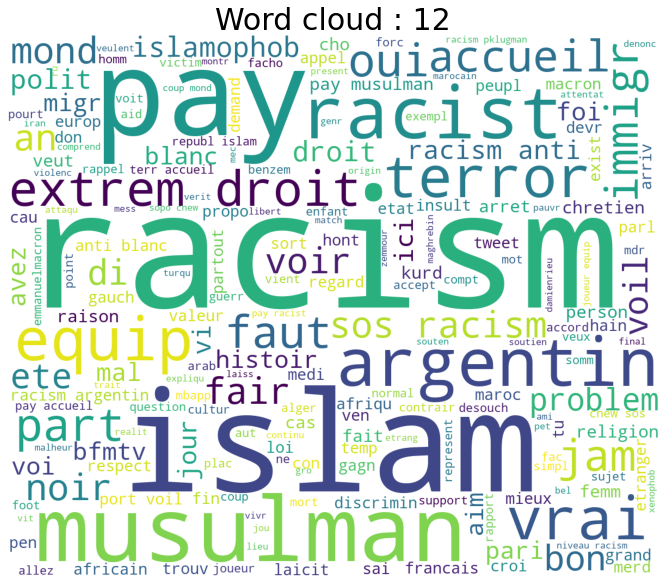

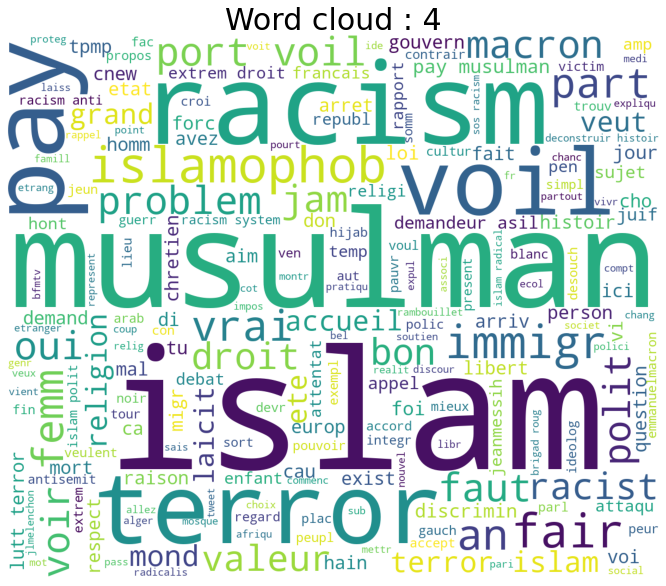

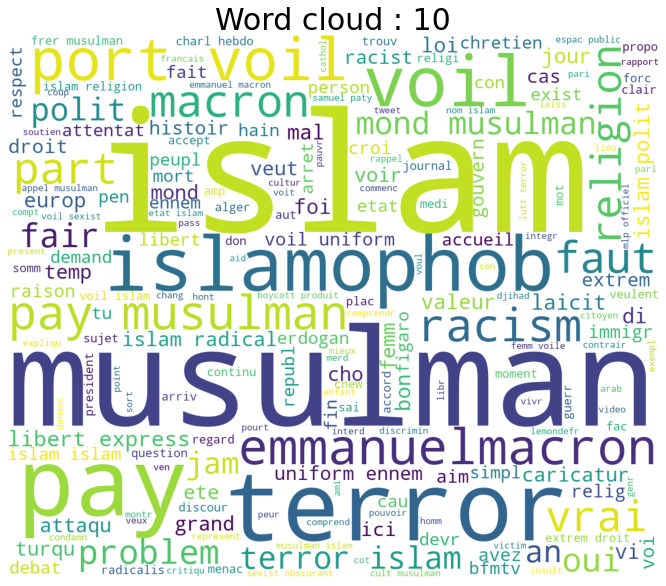

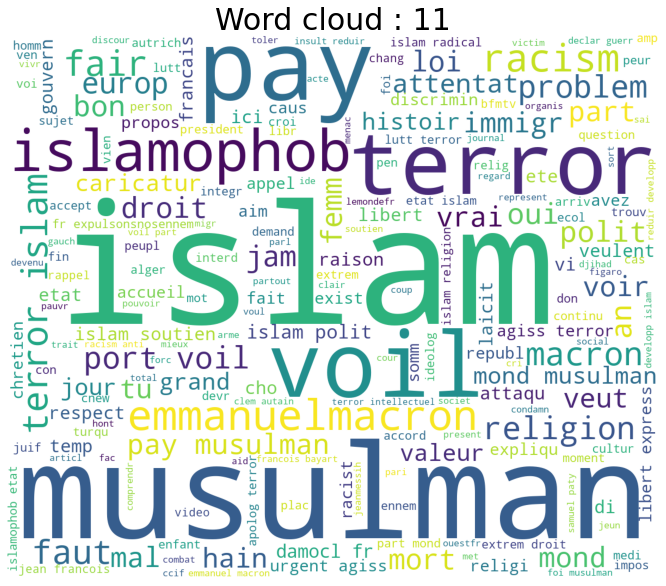

In [52]:
# Let's create a word cloud

for category in tweets['month'].unique():
    
    plt.figure(figsize=(20,10))
    
    text = tweets[tweets['month']==category]["text_stem"].values
    
    wordcloud_ = WordCloud(background_color='white',
                           collocations=True, # Includes bigrams -> Two words side by side, same color same size
                           width=1200,
                           height=1000,
                           stopwords=["anne", "cet", "franc"]).generate(" ".join(text))

    plt.axis('off')
    plt.title(f'Word cloud : {category}', fontsize=30)
    plt.imshow(wordcloud_)

# 3- Vectorization and modeling

In this section, we will mainly use the text column, which gathers all the comments about the covid. The objective is to use the LDA, to group the different tweets into 5 more or less distinct topics.

In [55]:
# Before applying LDA, we need to create a vocabulary using a vector count.
# We will keep the words that appear in at least 80% of the documents and that have a minimum frequency of 10 occurrences

count_vect = CountVectorizer(max_df=0.8, min_df=2)
matrix = count_vect.fit_transform(tweets['text_stem'].values.astype('U'))
matrix

<118576x45901 sparse matrix of type '<class 'numpy.int64'>'
	with 1538014 stored elements in Compressed Sparse Row format>

Each of the [1538014] tweets is represented by a dimensional vector of [...] words. In other words, our vocabulary is made of 4025 candidate words for the creation of a topic.
We will therefore perform the LDA on our matrix, specifying the wish to divide our text into 5 more or less disticnts topics.

In [57]:
LDA = LatentDirichletAllocation(n_components=5, random_state=42)
LDA.fit(matrix)

LatentDirichletAllocation(n_components=5, random_state=42)

If we want, for example, to retrieve at random the 10 words of our vocabulary, having the highest probability of qualifying the first subject, we will proceed as follows

In [58]:
first_topic = LDA.components_[0]
first_topic

array([0.20209636, 0.20557861, 0.20827985, ..., 3.19971457, 0.20000633,
       0.20001521])

In [59]:
# Let's sort the indexes according to the probability value

top_topic_words = first_topic.argsort()[-10:]
top_topic_words

array([11821,  9884, 33894, 14457, 32074, 28849, 14851, 33380, 20635,
       43622])

In [61]:
# Let's get the word values, corresponding to these different indexes

for i in top_topic_words:
    for i in top_topic_words:
        print(count_vect.get_feature_names()[i])

droit
debat
problem
fair
pay
musulman
femm
port
islam
voil
droit
debat
problem
fair
pay
musulman
femm
port
islam
voil
droit
debat
problem
fair
pay
musulman
femm
port
islam
voil
droit
debat
problem
fair
pay
musulman
femm
port
islam
voil
droit
debat
problem
fair
pay
musulman
femm
port
islam
voil
droit
debat
problem
fair
pay
musulman
femm
port
islam
voil
droit
debat
problem
fair
pay
musulman
femm
port
islam
voil
droit
debat
problem
fair
pay
musulman
femm
port
islam
voil
droit
debat
problem
fair
pay
musulman
femm
port
islam
voil
droit
debat
problem
fair
pay
musulman
femm
port
islam
voil


Below, we will generate the list of words that best define the content of each of the 5 desired topics.

In [62]:
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['droit', 'debat', 'problem', 'fair', 'pay', 'musulman', 'femm', 'port', 'islam', 'voil']


Top 10 words for topic #1:
['islamophob', 'mort', 'nic', 'attentat', 'pay', 'immigr', 'musulman', 'anne', 'terror', 'islam']


Top 10 words for topic #2:
['kurd', 'islam', 'paris', 'demand', 'an', 'anne', 'migr', 'accueil', 'asil', 'terror']


Top 10 words for topic #3:
['droit', 'macron', 'emmanuelmacron', 'mond', 'islamophob', 'religion', 'terror', 'pay', 'musulman', 'islam']


Top 10 words for topic #4:
['noir', 'islam', 'blanc', 'equip', 'argentin', 'anti', 'islamophob', 'racist', 'pay', 'racism']




Let's generate a column that stores the set of topics that are discussed in each tweet. Each document has 5 columns and each column corresponds to the probability value of a particular topic.

In [68]:
topic_values = LDA.transform(matrix)
topic_values.shape

(118576, 5)

In [70]:
tweets['Topic'] = topic_values.argmax(axis=1)
tweets.head()

Unnamed: 0.1  Unnamed: 0                   id            author_id  \
0             0           0  1604949964429426688           1257932018   
1             1           1  1604949944984653849  1417719872331595780   
2             2           2  1604949933508816896  1470318045314887683   
3             3           3  1604949930220847104            928722823   
4             4           4  1604949860993695746           2199917760   

                       date  edit_history_tweet_ids lang  in_reply_to_user_id  \
0 2022-12-19 21:21:04+00:00     1604949964429426688   fr                  NaN   
1 2022-12-19 21:21:00+00:00     1604949944984653849   fr          361857853.0   
2 2022-12-19 21:20:57+00:00     1604949933508816896   fr                  NaN   
3 2022-12-19 21:20:56+00:00     1604949930220847104   fr                  NaN   
4 2022-12-19 21:20:40+00:00     1604949860993695746   fr                  NaN   

       conversation_id                                               text  \
0  1604949964429426688  RT @_BeFootball: Quel accueil pour Léo Messi à...   
1  1604060382779396099  @Autochtone_fr @Jager80568144 @DubhStephane @A...   
2  1604949933508816896  RT @Marc_Claret75: 🔴Acceuil des migrants :nous...   
3  1604949930220847104  RT @Tajmaat_Service: 🇩🇿🇨🇵 FLASH - Un #Algérien...   
4  1604949860993695746  RT @chaine_verte: La Chaîne Verte est un group...   

   ... sentiment_textblob  sentiment_vader_cat sentiment_textblob_cat  \
0  ...              0.000              neutral                neutral   
1  ...              0.000             positive                neutral   
2  ...             -0.200             positive               negative   
3  ...              0.210             positive               positive   
4  ...              0.152             positive               positive   

         date sentiment_tf  year  month  \
0  2022-12-19     positive  2022     12   
1  2022-12-19     positive  2022     12   
2  2022-12-19     negative  2022     12   
3  2022-12-19     positive  2022     12   
4  2022-12-19     positive  2022     12   

                                           text_stem  num_words Topic  
0         befootball accueil leo mess franc kzmpi ad          7     1  
1  autochton fr jageranneeanne dubhstephan actufo...         11     4  
2  marc claret acceuil migr somm pass foi accueil...         14     2  
3  tajmaat servic flash algerien arriv franc age ...         13     1  
4  chain vert chain vert group citoyen franc euro...         13     0  

[5 rows x 58 columns]

In [71]:
# Let's add this column to our original dataframe

tweets['Topic'] = topic_values.argmax(axis=1)
tweets.head()

Unnamed: 0.1  Unnamed: 0                   id            author_id  \
0             0           0  1604949964429426688           1257932018   
1             1           1  1604949944984653849  1417719872331595780   
2             2           2  1604949933508816896  1470318045314887683   
3             3           3  1604949930220847104            928722823   
4             4           4  1604949860993695746           2199917760   

                       date  edit_history_tweet_ids lang  in_reply_to_user_id  \
0 2022-12-19 21:21:04+00:00     1604949964429426688   fr                  NaN   
1 2022-12-19 21:21:00+00:00     1604949944984653849   fr          361857853.0   
2 2022-12-19 21:20:57+00:00     1604949933508816896   fr                  NaN   
3 2022-12-19 21:20:56+00:00     1604949930220847104   fr                  NaN   
4 2022-12-19 21:20:40+00:00     1604949860993695746   fr                  NaN   

       conversation_id                                               text  \
0  1604949964429426688  RT @_BeFootball: Quel accueil pour Léo Messi à...   
1  1604060382779396099  @Autochtone_fr @Jager80568144 @DubhStephane @A...   
2  1604949933508816896  RT @Marc_Claret75: 🔴Acceuil des migrants :nous...   
3  1604949930220847104  RT @Tajmaat_Service: 🇩🇿🇨🇵 FLASH - Un #Algérien...   
4  1604949860993695746  RT @chaine_verte: La Chaîne Verte est un group...   

   ... sentiment_textblob  sentiment_vader_cat sentiment_textblob_cat  \
0  ...              0.000              neutral                neutral   
1  ...              0.000             positive                neutral   
2  ...             -0.200             positive               negative   
3  ...              0.210             positive               positive   
4  ...              0.152             positive               positive   

         date sentiment_tf  year  month  \
0  2022-12-19     positive  2022     12   
1  2022-12-19     positive  2022     12   
2  2022-12-19     negative  2022     12   
3  2022-12-19     positive  2022     12   
4  2022-12-19     positive  2022     12   

                                           text_stem  num_words Topic  
0         befootball accueil leo mess franc kzmpi ad          7     1  
1  autochton fr jageranneeanne dubhstephan actufo...         11     4  
2  marc claret acceuil migr somm pass foi accueil...         14     2  
3  tajmaat servic flash algerien arriv franc age ...         13     1  
4  chain vert chain vert group citoyen franc euro...         13     0  

[5 rows x 58 columns]

 **Visualisation**
 
We will display the top 10 bigrams belonging to each topic we have generated

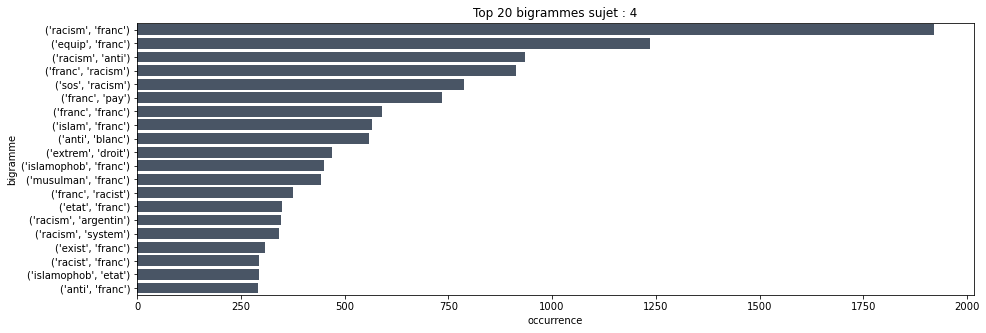

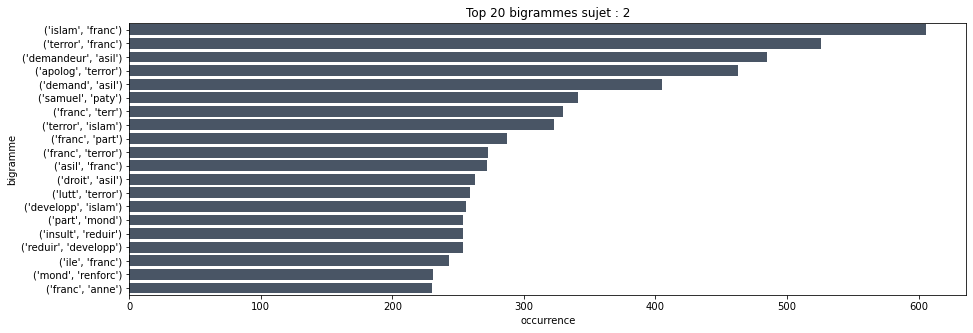

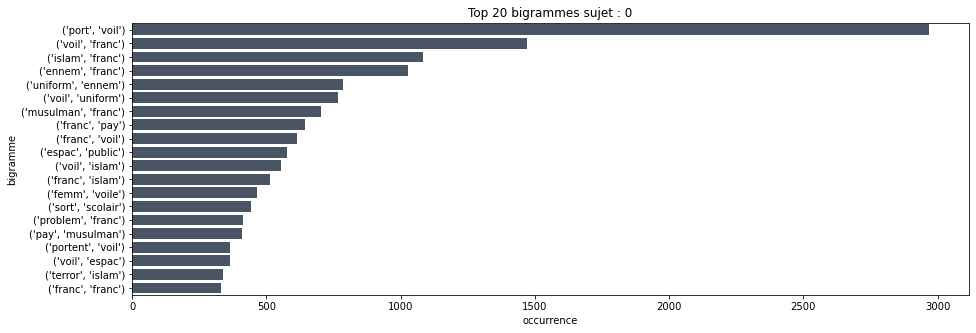

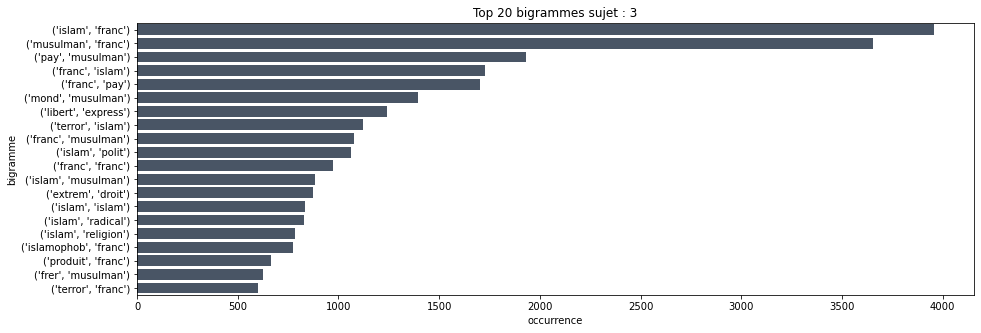

In [75]:
for topic in tweets['Topic'].unique():
    
    # Recovery in the form of a list of all the tweets
    list_tweets = tweets[tweets['Topic']==topic]["text_stem"].tolist()

    # Tokenization
    list_tokens = ' '.join(list_tweets).split()

    # Identification and counting of bigrams
    list_bigrams = list(ngrams(list_tokens, 2)) 
    counter = Counter(list_bigrams)

    # Creation of a dataframe containing the top 20 most frequent bigrams
    tweets_plot = pd.DataFrame(counter.most_common(20))
    
    # Plot creation
    plt.figure(figsize=(15,5))

    plot = sns.barplot(x=tweets_plot[1], 
                       y=tweets_plot[0],
                       color='#44546a')

    plt.xlabel('occurrence')
    plt.ylabel("bigramme")
    plt.title(f"Top 20 bigrammes sujet : {topic}") 